In [113]:
import os
import pandas as pd
import numpy as np
np.random.seed(42)


# Get a list of all files in the current working directory
files = os.listdir()
print(files)

['T_a1_new.csv', 'T_a2_new.csv', 'T_a3_new.csv', 'T_a4_new.csv', 'T_a6_new.csv', 'T_a5_new.csv', 'T_L2_new.csv', 'T_L3_new.csv', 'T_L4_new.csv', 'T_L6_new.csv', 'T_L5_new.csv', 'T_L1_new.csv', 'T_LS1_new.csv', 'T_LS3_new.csv', 'T_LS4_new.csv', 'T_LS2_new.csv', 'T_LS5_new.csv', 'T_LS6_new.csv', 'T_S1_new.csv', 'T_S2_new.csv', 'T_S3_new.csv', 'T_S4_new.csv', 'T_S6_new.csv', 'T_S5_new.csv', 'X_a2_new.csv', 'X_a1_new.csv', 'X_a3_new.csv', 'X_a4_new.csv', 'X_a5_new.csv', 'X_a6_new.csv', 'X_L2_new.csv', 'X_L1_new.csv', 'X_L5_new.csv', 'X_L4_new.csv', 'X_L3_new.csv', 'X_L6_new.csv', 'X_LS1_new.csv', 'X_LS3_new.csv', 'X_LS2_new.csv', 'X_LS6_new.csv', 'X_LS4_new.csv', 'X_LS5_new.csv', 'X_S1_new.csv', 'X_S2_new.csv', 'X_S3_new.csv', 'X_S4_new.csv', 'X_S5_new.csv', 'X_S6_new.csv', 'Last_Proj.ipynb', '.ipynb_checkpoints', 'X_300_Fault Classification.ipynb', 'FC_Classifier.h5', 'aemodel_ind.h5', 'GANs.ipynb', 'Last_Proj-Copy1.ipynb', 'Last_Proj-Explainability.ipynb']


## Data

In [114]:
col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

### Healthy

In [115]:
healthy_1_Torue = pd.read_csv('T_a1_new.csv',header=None, names=col_list)

Text(0.5, 0, 'Observation')

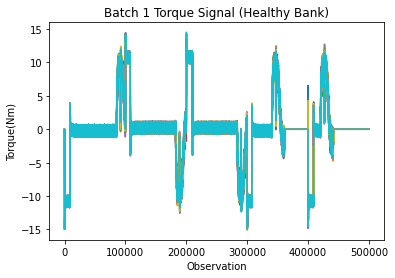

In [116]:
import matplotlib.pyplot as plt 
plt.plot(healthy_1_Torue)
plt.title('Batch 1 Torque Signal (Healthy Bank)')
plt.ylabel('Torque(Nm)')
plt.xlabel('Observation')

In [117]:
healthy_1_Position = pd.read_csv('X_a1_new.csv',header=None, names=col_list)

Text(0.5, 0, 'Observation')

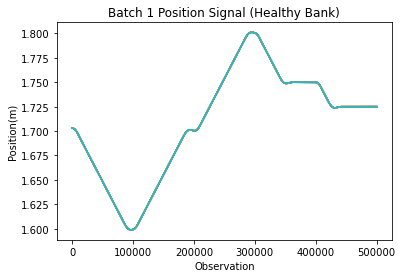

In [118]:
import matplotlib.pyplot as plt 
plt.plot(healthy_1_Position)
plt.title('Batch 1 Position Signal (Healthy Bank)')
plt.ylabel('Position(m)')
plt.xlabel('Observation')

### Faulty

In [119]:
Faulty_1_Torque = pd.read_csv('T_S1_new.csv',header=None, names=col_list)

Text(0.5, 0, 'Observation')

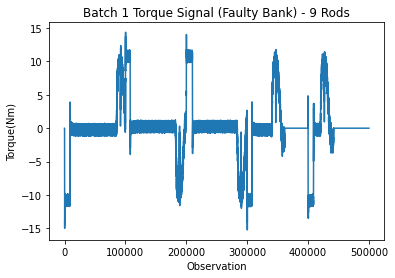

In [120]:
import matplotlib.pyplot as plt 
plt.plot(Faulty_1_Torque.iloc[:,8])
plt.title('Batch 1 Torque Signal (Faulty Bank) - 9 Rods')
plt.ylabel('Torque(Nm)')
plt.xlabel('Observation')

Text(0.5, 0, 'Observation')

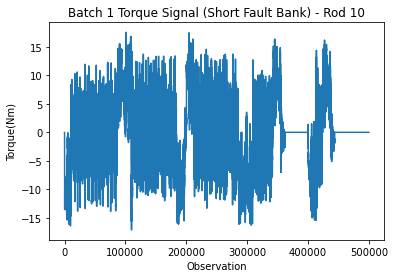

In [121]:
import matplotlib.pyplot as plt 
plt.plot(Faulty_1_Torque.iloc[:,9])
plt.title('Batch 1 Torque Signal (Short Fault Bank) - Rod 10')
plt.ylabel('Torque(Nm)')
plt.xlabel('Observation')

In [122]:
Faulty_1_Position = pd.read_csv('X_S1_new.csv',header=None, names=col_list)

Text(0.5, 0, 'Observation')

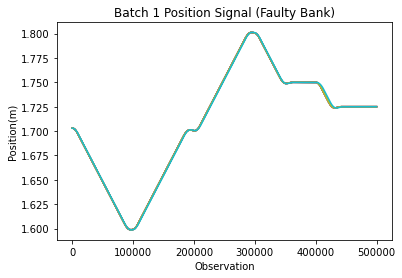

In [123]:
import matplotlib.pyplot as plt 
plt.plot(Faulty_1_Position)
plt.title('Batch 1 Position Signal (Faulty Bank)')
plt.ylabel('Position(m)')
plt.xlabel('Observation')

In [124]:
Faulty_1_Torque = pd.read_csv('T_LS1_new.csv',header=None, names=col_list)

Text(0.5, 0, 'Observation')

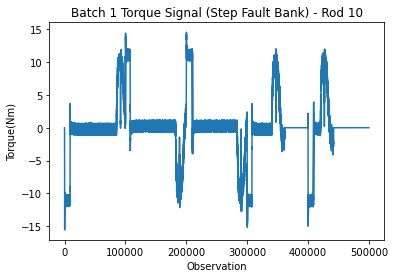

In [125]:
import matplotlib.pyplot as plt 
plt.plot(Faulty_1_Torque.iloc[:,9])
plt.title('Batch 1 Torque Signal (Step Fault Bank) - Rod 10')
plt.ylabel('Torque(Nm)')
plt.xlabel('Observation')

In [126]:
Faulty_1_Torque = pd.read_csv('T_L1_new.csv',header=None, names=col_list)

Text(0.5, 0, 'Observation')

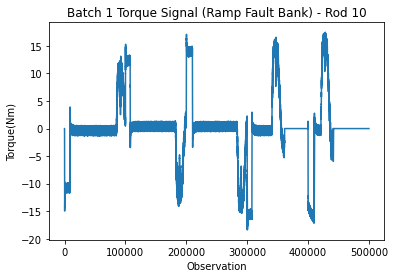

In [127]:
import matplotlib.pyplot as plt 
plt.plot(Faulty_1_Torque.iloc[:,9])
plt.title('Batch 1 Torque Signal (Ramp Fault Bank) - Rod 10')
plt.ylabel('Torque(Nm)')
plt.xlabel('Observation')

## Using Torque Variable

### Individual Batches

#### Batch 1

In [128]:
col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

healthy_1 = pd.read_csv('T_a1_new.csv',header=None, names=col_list)
short_fault_1 = pd.read_csv('T_S1_new.csv',header=None, names=col_list)
step_fault_1 = pd.read_csv('T_LS1_new.csv',header=None, names=col_list)
ramp_fault_1 = pd.read_csv('T_L1_new.csv',header=None, names=col_list)

In [129]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Load and preprocess data
healthy_1=np.array(healthy_1)
X_train_ind = scaler.fit_transform(healthy_1[0:int(0.7*len(healthy_1)),:])
X_test_ind_a = scaler.transform(healthy_1[int(0.7*len(healthy_1)):,:])
X_test_ind_S = scaler.transform(np.array(short_fault_1))
X_test_ind_LS = scaler.transform(np.array(step_fault_1))
X_test_ind_L = scaler.transform(np.array(ramp_fault_1))

In [130]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Define the model
input_dim = X_train_ind.shape[1]
latent_dim = 2
AE_model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(latent_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# Compile the model
AE_model.compile(optimizer='adam', loss='mse')


In [131]:
from tensorflow.keras.callbacks import ModelCheckpoint
# define the checkpoint filepath
checkpoint_filepath = 'aemodel_ind.h5'

# create the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=False
)

In [132]:
AE_model.fit(X_train_ind, X_train_ind, epochs=6, batch_size=64, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/6
4375/4375 [==============================] - 5s 1ms/step - loss: 0.0137 - val_loss: 0.0107
Epoch 2/6
4375/4375 [==============================] - 4s 954us/step - loss: 0.0052 - val_loss: 0.0108
Epoch 3/6
4375/4375 [==============================] - 4s 991us/step - loss: 0.0050 - val_loss: 0.0104
Epoch 4/6
4375/4375 [==============================] - 4s 957us/step - loss: 0.0050 - val_loss: 0.0106
Epoch 5/6
4375/4375 [==============================] - 4s 952us/step - loss: 0.0049 - val_loss: 0.0105
Epoch 6/6
4375/4375 [==============================] - 4s 948us/step - loss: 0.0049 - val_loss: 0.0106


4688/4688 [==============================] - 3s 546us/step
Number of anomalies: 7500


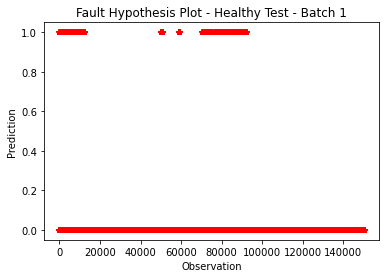

In [133]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_a)
mse = np.mean(np.power(X_test_ind_a - X_pred, 2), axis=1)
threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Healthy Test - Batch 1')
plt.show()

4688/4688 [==============================] - 3s 563us/step


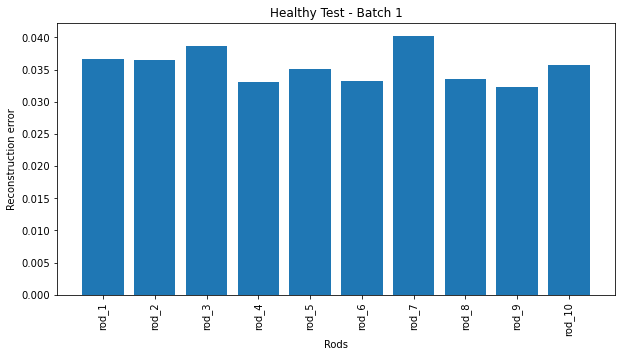

In [134]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_a)
test_data_recon_error = np.abs(X_test_ind_a - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
# plt.ylim(0,0.55)
plt.xlabel('Rods')
plt.title('Healthy Test - Batch 1')
plt.show()

15626/15626 [==============================] - 9s 574us/step
Number of anomalies: 239808


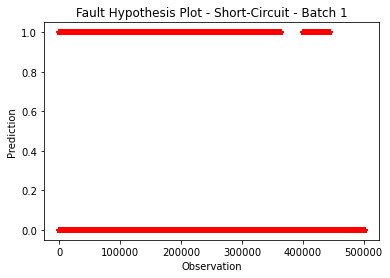

In [135]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_S)
mse = np.mean(np.power(X_test_ind_S - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Short-Circuit - Batch 1')
plt.show()

15626/15626 [==============================] - 9s 566us/step


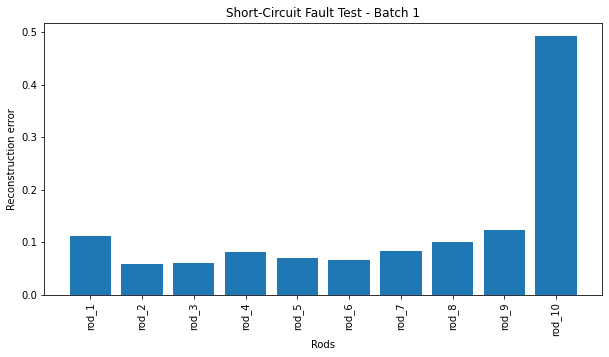

In [136]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_S)
test_data_recon_error = np.abs(X_test_ind_S - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
# plt.ylim(0,0.6)
plt.xlabel('Rods')
plt.title('Short-Circuit Fault Test - Batch 1')
plt.show()

15626/15626 [==============================] - 9s 569us/step
Number of anomalies: 88545


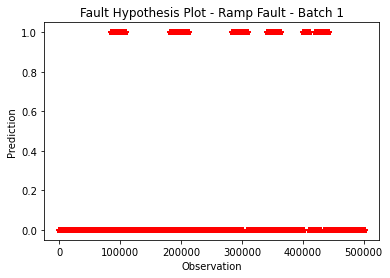

In [137]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_L)
mse = np.mean(np.power(X_test_ind_L - X_pred, 2), axis=1)
# threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Ramp Fault - Batch 1')
plt.show()

15626/15626 [==============================] - 9s 564us/step


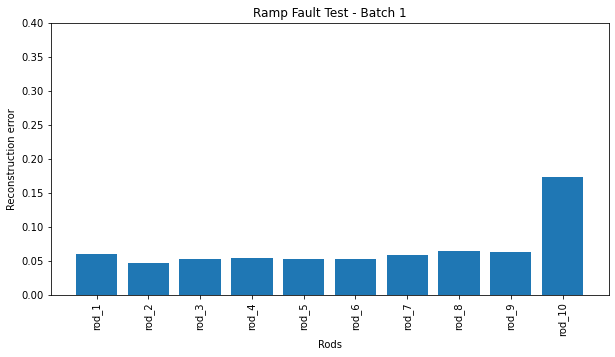

In [138]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_L)
test_data_recon_error = np.abs(X_test_ind_L - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.4)
plt.title('Ramp Fault Test - Batch 1')
plt.show()

15626/15626 [==============================] - 9s 558us/step
Number of anomalies: 18449


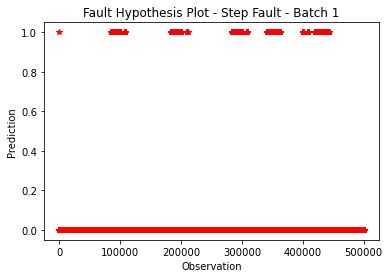

In [139]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_LS)
mse = np.mean(np.power(X_test_ind_LS - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Step Fault - Batch 1')
plt.show()

15626/15626 [==============================] - 9s 559us/step


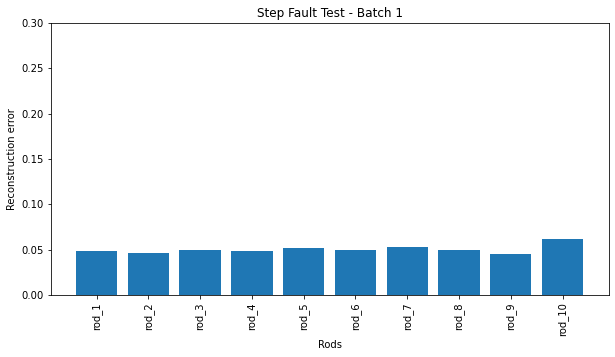

In [140]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_LS)
test_data_recon_error = np.abs(X_test_ind_LS - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.3)
plt.title('Step Fault Test - Batch 1')
plt.show()

#### Batch 5

In [141]:
healthy_5 = pd.read_csv('T_a5_new.csv',header=None, names=col_list)
short_fault_5 = pd.read_csv('T_S5_new.csv',header=None, names=col_list)
step_fault_5 = pd.read_csv('T_LS5_new.csv',header=None, names=col_list)
ramp_fault_5 = pd.read_csv('T_L5_new.csv',header=None, names=col_list)

In [142]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Load and preprocess data
healthy_5=np.array(healthy_5)
X_train_ind = scaler.fit_transform(healthy_5[0:int(0.7*len(healthy_5)),:])
X_test_ind_a = scaler.transform(healthy_5[int(0.7*len(healthy_5)):,:])
X_test_ind_S = scaler.transform(np.array(short_fault_5))
X_test_ind_LS = scaler.transform(np.array(step_fault_5))
X_test_ind_L = scaler.transform(np.array(ramp_fault_5))

In [143]:
AE_model.fit(X_train_ind, X_train_ind, epochs=6, batch_size=64, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/6
4375/4375 [==============================] - 4s 1ms/step - loss: 0.0050 - val_loss: 0.0095
Epoch 2/6
4375/4375 [==============================] - 4s 1ms/step - loss: 0.0048 - val_loss: 0.0094
Epoch 3/6
4375/4375 [==============================] - 4s 1ms/step - loss: 0.0047 - val_loss: 0.0094
Epoch 4/6
4375/4375 [==============================] - 4s 1ms/step - loss: 0.0047 - val_loss: 0.0093
Epoch 5/6
4375/4375 [==============================] - 4s 977us/step - loss: 0.0047 - val_loss: 0.0095
Epoch 6/6
4375/4375 [==============================] - 4s 961us/step - loss: 0.0046 - val_loss: 0.0094


4688/4688 [==============================] - 3s 561us/step
Number of anomalies: 7500


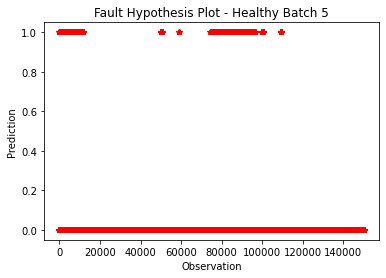

In [144]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_a)
mse = np.mean(np.power(X_test_ind_a - X_pred, 2), axis=1)
threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Healthy Batch 5')
plt.show()

4688/4688 [==============================] - 3s 566us/step


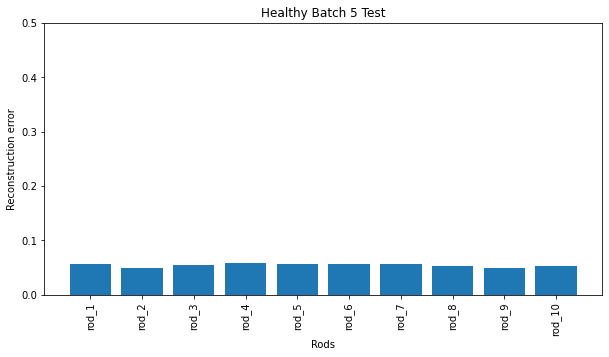

In [145]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_a)
test_data_recon_error = np.abs(X_test_ind_a - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.5)
plt.title('Healthy Batch 5 Test')
plt.show()

15626/15626 [==============================] - 9s 564us/step
Number of anomalies: 218471


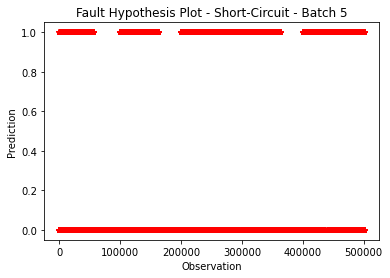

In [146]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_S)
mse = np.mean(np.power(X_test_ind_S - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Short-Circuit - Batch 5')
plt.show()

15626/15626 [==============================] - 9s 557us/step


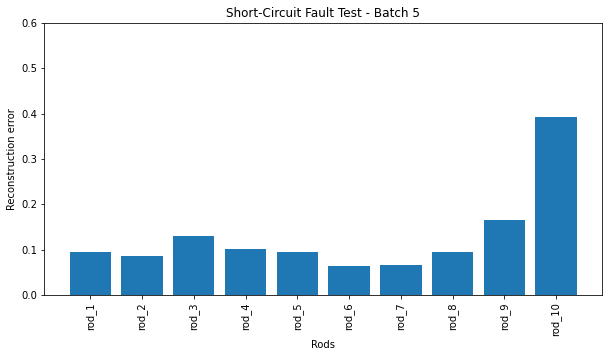

In [147]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_S)
test_data_recon_error = np.abs(X_test_ind_S - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.6)
plt.title('Short-Circuit Fault Test - Batch 5')
plt.show()

15626/15626 [==============================] - 9s 558us/step
Number of anomalies: 94428


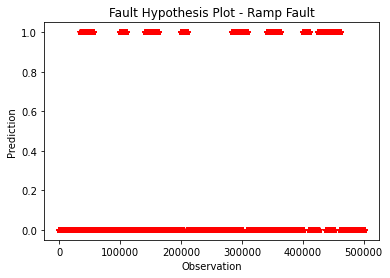

In [148]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_L)
mse = np.mean(np.power(X_test_ind_L - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Ramp Fault')
plt.show()

15626/15626 [==============================] - 9s 559us/step


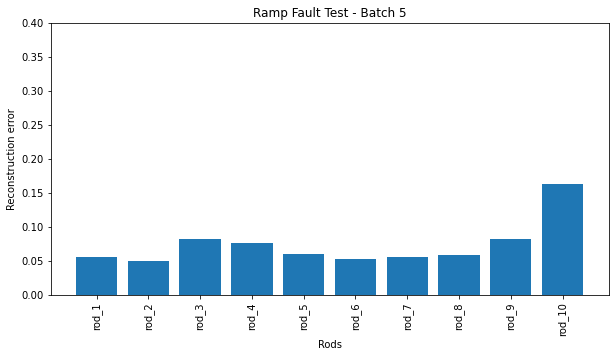

In [149]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_L)
test_data_recon_error = np.abs(X_test_ind_L - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.4)
plt.title('Ramp Fault Test - Batch 5')
plt.show()

15626/15626 [==============================] - 9s 568us/step
Number of anomalies: 20113


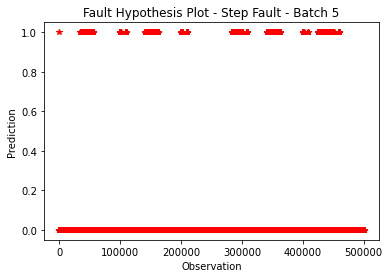

In [150]:
# Evaluate the model
X_pred = AE_model.predict(X_test_ind_LS)
mse = np.mean(np.power(X_test_ind_LS - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Step Fault - Batch 5')
plt.show()

15626/15626 [==============================] - 9s 558us/step


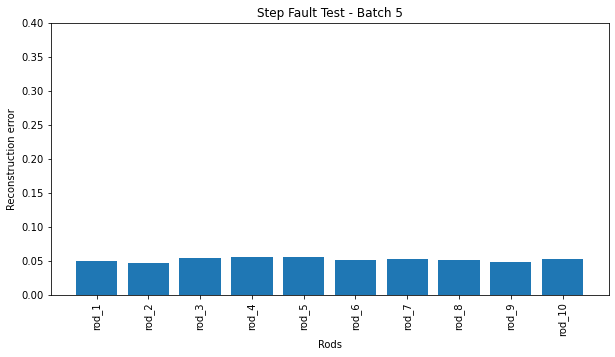

In [151]:
# Calculate reconstruction error for each variable on test data
test_data_pred = AE_model.predict(X_test_ind_LS)
test_data_recon_error = np.abs(X_test_ind_LS - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), col_list, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.4)
plt.title('Step Fault Test - Batch 5')
plt.show()

### Combined Batch Test

In [152]:
# Filter the list to keep only healthy torque files that start with 'T_a_'
files_ = [f for f in files if f.startswith('T_a')]

col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
healthy_torque_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(healthy_torque_df.shape)
healthy_torque_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21
1,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19
2,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14
3,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13
4,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13


In [153]:
# Filter the list to keep only short-circuit torque files that start with 'T_S_'
files_ = [f for f in files if f.startswith('T_S')]

col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
short_torque_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(short_torque_df.shape)
short_torque_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,1.456300e-13
1,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,3.136300e-12
2,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,8.327500e-12
3,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.566000e-11
4,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,2.516600e-11


In [154]:
# Filter the list to keep only step fault torque files that start with 'T_LS'
files_ = [f for f in files if f.startswith('T_LS')]

col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
step_torque_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(step_torque_df.shape)
step_torque_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21
1,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19
2,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14
3,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13
4,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13


In [155]:
# Filter the list to keep only Ramp fault torque files that start with 'T_L_'
files_ = [f for f in files if f.startswith('T_L')]
files_ = [f for f in files_ if not f.startswith('T_LS')]
col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
ramp_torque_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(ramp_torque_df.shape)
ramp_torque_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21,3.051400e-21
1,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19,-3.414800e-19
2,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14,5.825400e-14
3,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13,1.663400e-13
4,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13,3.378900e-13


In [156]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Load and preprocess data
healthy_torque=np.array(healthy_torque_df)
X_train = scaler.fit_transform(healthy_torque[0:int(0.7*len(healthy_torque)),:])
X_test_a = scaler.transform(healthy_torque[int(0.7*len(healthy_torque)):,:])
X_test_s = scaler.transform(np.array(short_torque_df))

# Define the model
input_dim = X_train.shape[1]
latent_dim = 2
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(latent_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [157]:
# Train the model
model.fit(X_train, X_train, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6
26251/26251 [==============================] - 27s 986us/step - loss: 0.0106 - val_loss: 0.0123
Epoch 2/6
26251/26251 [==============================] - 27s 1ms/step - loss: 0.0074 - val_loss: 0.0121
Epoch 3/6
26251/26251 [==============================] - 27s 1ms/step - loss: 0.0074 - val_loss: 0.0120
Epoch 4/6
26251/26251 [==============================] - 27s 1ms/step - loss: 0.0072 - val_loss: 0.0121
Epoch 5/6
26251/26251 [==============================] - 27s 1ms/step - loss: 0.0072 - val_loss: 0.0121
Epoch 6/6
26251/26251 [==============================] - 27s 1ms/step - loss: 0.0071 - val_loss: 0.0121


28126/28126 [==============================] - 16s 553us/step
Number of anomalies: 45000


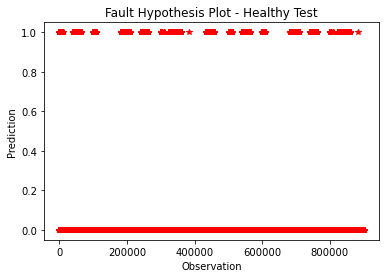

In [159]:
# Evaluate the model
X_pred = model.predict(X_test_a)
mse = np.mean(np.power(X_test_a - X_pred, 2), axis=1)
threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Healthy Test')
plt.show()

28126/28126 [==============================] - 16s 563us/step


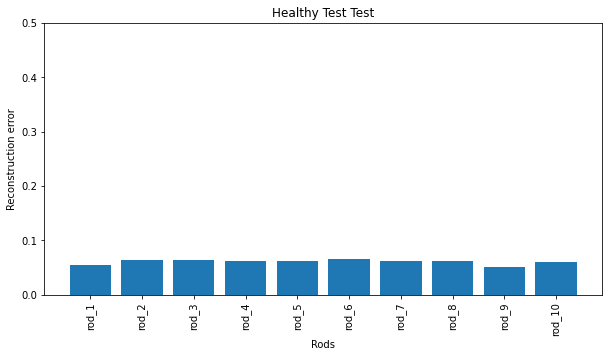

In [160]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model.predict(X_test_a)
test_data_recon_error = np.abs(X_test_a - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.5)
plt.title('Healthy Test Test')
plt.show()

In [161]:
col_threshold_a = np.percentile(variable_recon_error, 95)
# anomalies = np.where(variable_recon_error > col_threshold_a)[0]

93751/93751 [==============================] - 54s 573us/step
Number of anomalies: 1512910


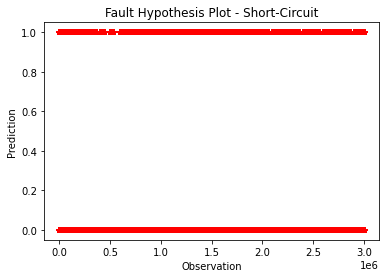

In [162]:
# Evaluate the model
X_pred = model.predict(X_test_s)
mse = np.mean(np.power(X_test_s - X_pred, 2), axis=1)
# threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Short-Circuit')
plt.show()

93751/93751 [==============================] - 53s 566us/step


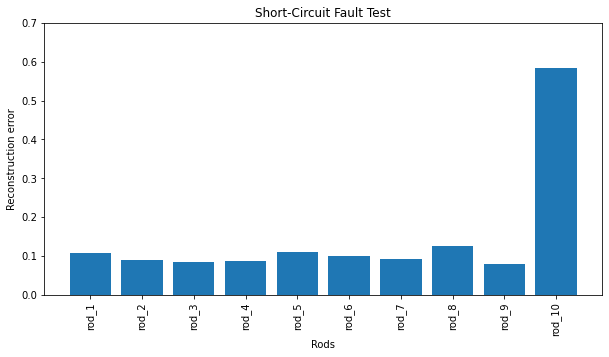

In [163]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model.predict(X_test_s)
test_data_recon_error = np.abs(X_test_s - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.7)
plt.title('Short-Circuit Fault Test')
plt.show()

93751/93751 [==============================] - 53s 563us/step
Number of anomalies: 566606


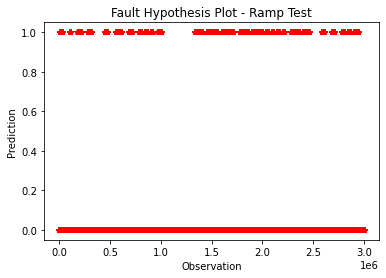

In [164]:
X_test_ramp = scaler.transform(np.array(ramp_torque_df))

# Evaluate the model
X_pred = model.predict(X_test_ramp)
mse = np.mean(np.power(X_test_ramp - X_pred, 2), axis=1)
# threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Ramp Test')
plt.show()

93751/93751 [==============================] - 54s 571us/step


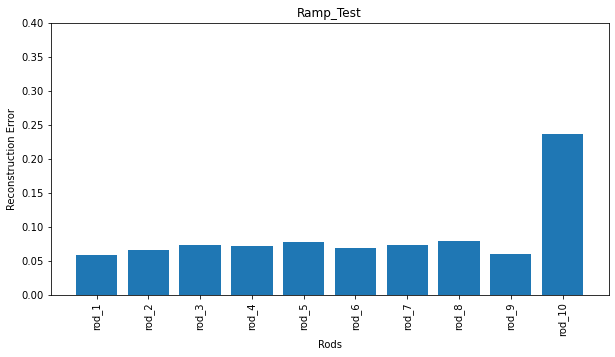

In [165]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model.predict(X_test_ramp)
test_data_recon_error = np.abs(X_test_ramp - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
plt.ylim(0,0.4)
plt.title('Ramp_Test')
plt.show()

93751/93751 [==============================] - 54s 571us/step
Number of anomalies: 229714


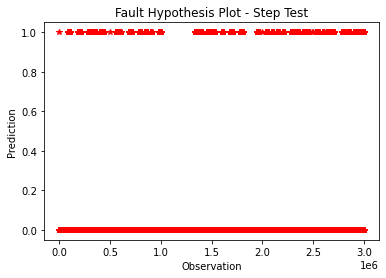

In [166]:
X_test_step = scaler.transform(np.array(step_torque_df))

# Evaluate the model
X_pred = model.predict(X_test_step)
mse = np.mean(np.power(X_test_step - X_pred, 2), axis=1)
# threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Step Test')
plt.show()

93751/93751 [==============================] - 54s 580us/step


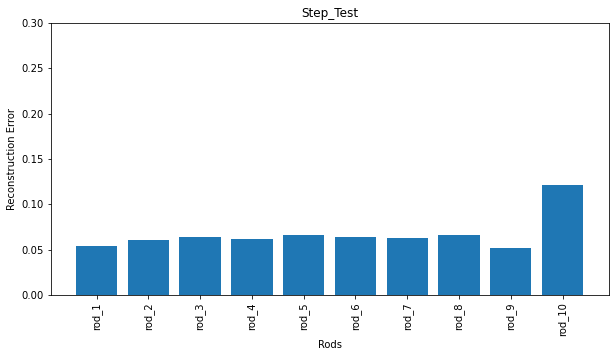

In [167]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model.predict(X_test_step)
test_data_recon_error = np.abs(X_test_step - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
plt.ylim(0,0.3)
plt.title('Step_Test')
plt.show()

### Multiple Faults in a Bank

In [168]:
X_test_s[:,9:10].shape

(3000006, 1)

In [169]:
X_ramp_step = np.concatenate([X_test_s[:,0:4], X_test_ramp[:,9:10],X_test_s[:,5:9],X_test_step[:,9:10]], axis=1)
X_ramp_step.shape

(3000006, 10)

93751/93751 [==============================] - 53s 560us/step


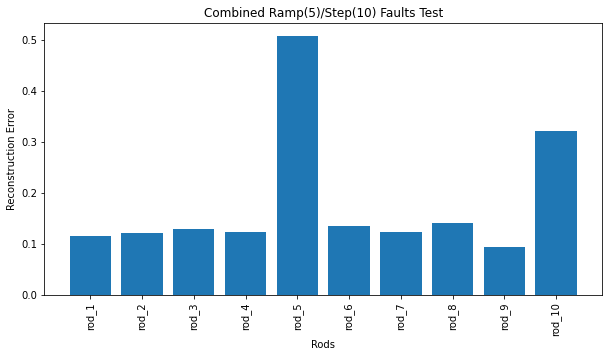

In [170]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model.predict(X_ramp_step)
test_data_recon_error = np.abs(X_ramp_step - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
plt.title('Combined Ramp(5)/Step(10) Faults Test')
plt.show()

Number of anomalies: 2


Text(0.5, 1.0, 'Combined Ramp(5)/Step(10) Faults Test')

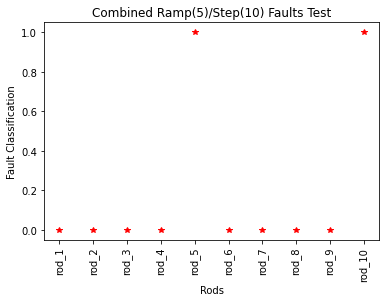

In [171]:
col_threshold = np.percentile(variable_recon_error, 80)
anomalies = np.where(variable_recon_error > col_threshold)[0]
print('Number of anomalies:', len(anomalies))
predictions = np.zeros_like(variable_recon_error)
predictions[variable_recon_error > col_threshold] = 1
plt.plot(range(1, input_dim+1), predictions,'r*')
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Fault Classification')
plt.xlabel('Rods')
# plt.ylim(0,1)
plt.title('Combined Ramp(5)/Step(10) Faults Test')

In [172]:
X_short_ramp_step = np.concatenate([X_test_s[:,9:10], X_test_s[:,0:3], X_test_ramp[:,9:10],X_test_s[:,5:9],X_test_step[:,9:10]], axis=1)
X_short_ramp_step.shape

(3000006, 10)

93751/93751 [==============================] - 54s 570us/step


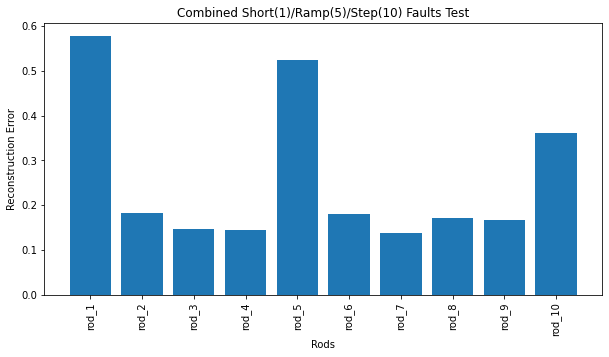

In [173]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model.predict(X_short_ramp_step)
test_data_recon_error = np.abs(X_short_ramp_step - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
plt.title('Combined Short(1)/Ramp(5)/Step(10) Faults Test')
plt.show()

Number of anomalies: 3


Text(0.5, 1.0, 'Combined Short(1)/Ramp(5)/Step(10) Faults Test')

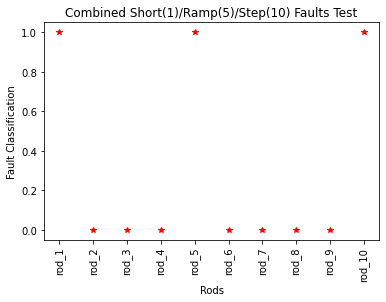

In [174]:
col_threshold = np.percentile(variable_recon_error, 70)
anomalies = np.where(variable_recon_error > col_threshold)[0]
print('Number of anomalies:', len(anomalies))
predictions = np.zeros_like(variable_recon_error)
predictions[variable_recon_error > col_threshold] = 1
plt.plot(range(1, input_dim+1), predictions,'r*')
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Fault Classification')
plt.xlabel('Rods')
# plt.ylim(0,1)
plt.title('Combined Short(1)/Ramp(5)/Step(10) Faults Test')

## Minimum Required Effective Variables

### 3 Rods

In [175]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Load and preprocess data
healthy_torque=np.array(healthy_torque_df)
X_train_m3 = scaler.fit_transform(healthy_torque[0:int(0.7*len(healthy_torque)),7:10])
X_test_m3_a = scaler.transform(healthy_torque[int(0.7*len(healthy_torque)):,7:10])
X_test_m3_s = scaler.transform(np.array(short_torque_df)[:,7:10])
X_test_m3_ramp = scaler.transform(np.array(ramp_torque_df)[:,7:10])
X_test_m3_step = scaler.transform(np.array(step_torque_df)[:,7:10])


# Define the model
input_dim = X_train_m3.shape[1]
latent_dim = 1
model_3 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(latent_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# Compile the model
model_3.compile(optimizer='adam', loss='mse')


In [176]:
model_3.fit(X_train_m3, X_train_m3, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6
26251/26251 [==============================] - 26s 978us/step - loss: 0.0118 - val_loss: 0.0114
Epoch 2/6
26251/26251 [==============================] - 25s 969us/step - loss: 0.0064 - val_loss: 0.0116
Epoch 3/6
26251/26251 [==============================] - 26s 987us/step - loss: 0.0064 - val_loss: 0.0115
Epoch 4/6
26251/26251 [==============================] - 25s 968us/step - loss: 0.0064 - val_loss: 0.0122
Epoch 5/6
26251/26251 [==============================] - 26s 973us/step - loss: 0.0064 - val_loss: 0.0114
Epoch 6/6
26251/26251 [==============================] - 26s 977us/step - loss: 0.0064 - val_loss: 0.0114


28126/28126 [==============================] - 16s 551us/step


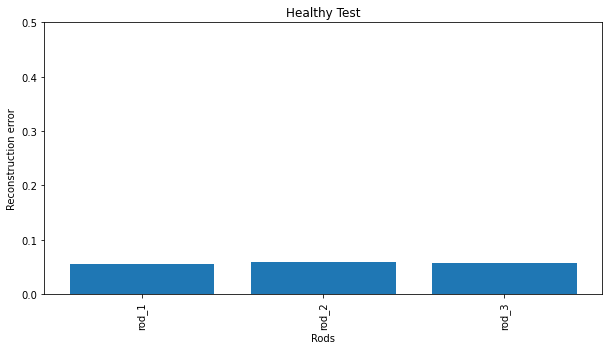

In [177]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model_3.predict(X_test_m3_a)
test_data_recon_error = np.abs(X_test_m3_a - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:3], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.5)
plt.title('Healthy Test')
plt.show()

93751/93751 [==============================] - 53s 567us/step


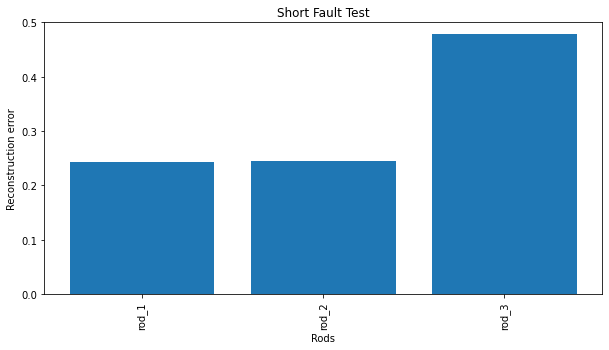

In [178]:
test_data_pred = model_3.predict(X_test_m3_s)
test_data_recon_error = np.abs(X_test_m3_s - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:3], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
plt.ylim(0,0.5)
plt.title('Short Fault Test')
plt.show()

93751/93751 [==============================] - 52s 553us/step


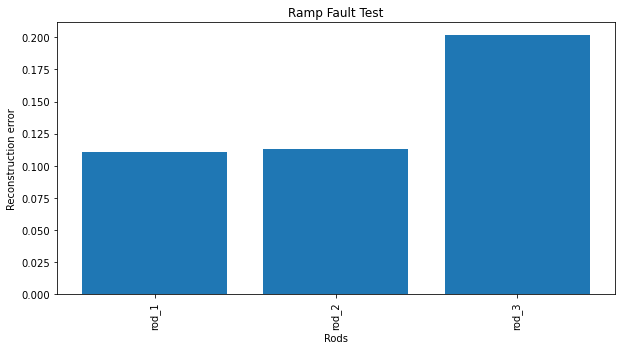

In [179]:
test_data_pred = model_3.predict(X_test_m3_ramp)
test_data_recon_error = np.abs(X_test_m3_ramp - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:3], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
# plt.ylim(0,0.5)
plt.title('Ramp Fault Test')
plt.show()

93751/93751 [==============================] - 52s 556us/step


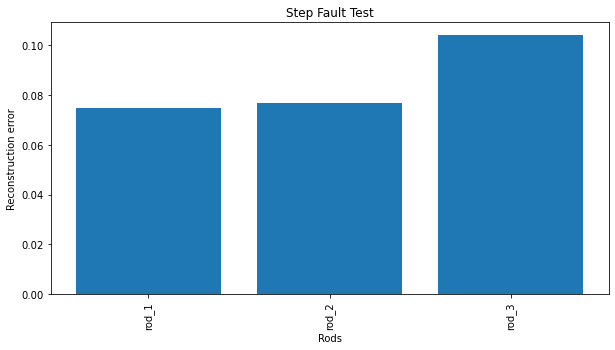

In [180]:
test_data_pred = model_3.predict(X_test_m3_step)
test_data_recon_error = np.abs(X_test_m3_step - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:3], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
# plt.ylim(0,0.5)
plt.title('Step Fault Test')
plt.show()

### 2 Rods

In [181]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Load and preprocess data
healthy_torque=np.array(healthy_torque_df)
X_train_m2 = scaler.fit_transform(healthy_torque[0:int(0.7*len(healthy_torque)),8:10])
X_test_m2_a = scaler.transform(healthy_torque[int(0.7*len(healthy_torque)):,8:10])
X_test_m2_s = scaler.transform(np.array(short_torque_df)[:,8:10])
X_test_m2_ramp = scaler.transform(np.array(ramp_torque_df)[:,8:10])
X_test_m2_step = scaler.transform(np.array(step_torque_df)[:,8:10])


# Define the model
input_dim = X_train_m2.shape[1]
latent_dim = 1
model_4 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(latent_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# Compile the model
model_4.compile(optimizer='adam', loss='mse')


In [182]:
model_4.fit(X_train_m2, X_train_m2, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6
26251/26251 [==============================] - 26s 972us/step - loss: 0.0097 - val_loss: 0.0080
Epoch 2/6
26251/26251 [==============================] - 25s 968us/step - loss: 0.0050 - val_loss: 0.0081
Epoch 3/6
26251/26251 [==============================] - 25s 970us/step - loss: 0.0050 - val_loss: 0.0079
Epoch 4/6
26251/26251 [==============================] - 26s 983us/step - loss: 0.0050 - val_loss: 0.0079
Epoch 5/6
26251/26251 [==============================] - 26s 976us/step - loss: 0.0049 - val_loss: 0.0079
Epoch 6/6
26251/26251 [==============================] - 26s 974us/step - loss: 0.0049 - val_loss: 0.0079


28126/28126 [==============================] - 16s 557us/step


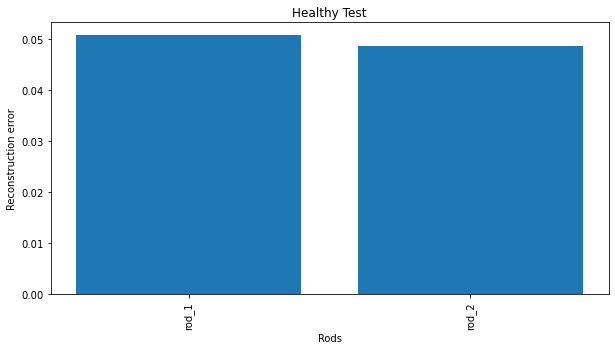

In [183]:
# Calculate reconstruction error for each variable on test data
test_data_pred = model_4.predict(X_test_m2_a)
test_data_recon_error = np.abs(X_test_m2_a - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:2], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
# plt.ylim(0,0.5)
plt.title('Healthy Test')
plt.show()

93751/93751 [==============================] - 53s 561us/step


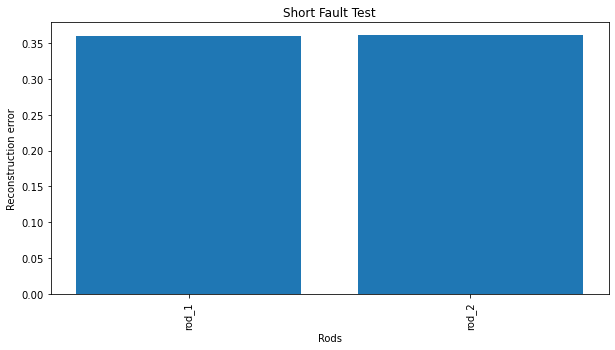

In [184]:
test_data_pred = model_4.predict(X_test_m2_s)
test_data_recon_error = np.abs(X_test_m2_s - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:2], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
# plt.ylim(0,0.5)
plt.title('Short Fault Test')
plt.show()

93751/93751 [==============================] - 52s 553us/step


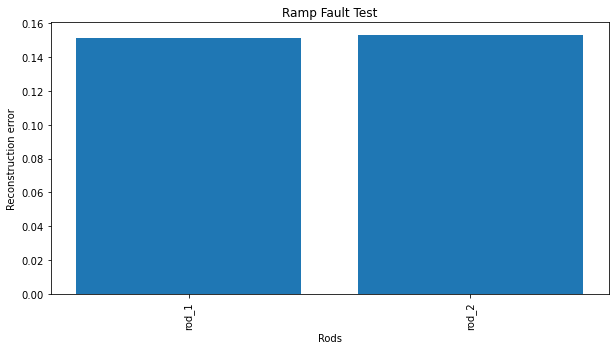

In [185]:
test_data_pred = model_4.predict(X_test_m2_ramp)
test_data_recon_error = np.abs(X_test_m2_ramp - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:2], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
# plt.ylim(0,0.5)
plt.title('Ramp Fault Test')
plt.show()

93751/93751 [==============================] - 53s 562us/step


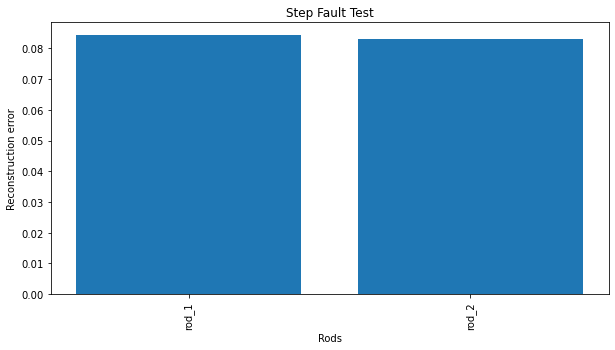

In [186]:
test_data_pred = model_4.predict(X_test_m2_step)
test_data_recon_error = np.abs(X_test_m2_step - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)
# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns[0:2], rotation=90)
plt.ylabel('Reconstruction error')
plt.xlabel('Rods')
# plt.ylim(0,0.5)
plt.title('Step Fault Test')
plt.show()

## Using Position Variable

In [187]:
# Filter the list to keep only healthy Position files that start with 'X_a_'
files_ = [f for f in files if f.startswith('X_a')]

col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
healthy_position_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(healthy_position_df.shape)
healthy_position_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
1,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
2,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
3,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
4,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811


In [188]:
# Filter the list to keep only short-circuit Position files that start with 'X_S_'
files_ = [f for f in files if f.startswith('X_S')]

col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
short_position_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(short_position_df.shape)
short_position_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
1,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
2,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
3,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
4,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703


In [189]:
# Filter the list to keep only step fault position files that start with 'X_LS'
files_ = [f for f in files if f.startswith('X_LS')]

col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
step_position_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(step_position_df.shape)
step_position_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
1,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
2,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
3,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703
4,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703,1.703


In [190]:
# Filter the list to keep only Ramp fault position files that start with 'X_L_'
files_ = [f for f in files if f.startswith('X_L')]
files_ = [f for f in files_ if not f.startswith('X_LS')]
col_list = ['rod_1','rod_2','rod_3','rod_4','rod_5','rod_6','rod_7','rod_8','rod_9','rod_10']

# Load the files into a DataFrame
ramp_position_df = pd.concat([pd.read_csv(f,header=None, names=col_list) for f in files_], ignore_index=True)
print(ramp_position_df.shape)
ramp_position_df.head()

(3000006, 10)


,rod_1,rod_2,rod_3,rod_4,rod_5,rod_6,rod_7,rod_8,rod_9,rod_10
0,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
1,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
2,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
3,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811
4,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811,0.811


In [191]:
# Load and preprocess data

x_train_position = scaler.fit_transform(np.array(healthy_position_df)[0:int(0.7*len(healthy_position_df)),:])
X_test_pos_a = scaler.transform(np.array(healthy_position_df)[int(0.7*len(healthy_position_df)):,:])
x_test_pos_shor = scaler.transform(np.array(short_position_df))
x_test_pos_step = scaler.transform(np.array(step_position_df))
x_test_pos_ramp = scaler.transform(np.array(ramp_position_df))

In [192]:
np.random.seed(42)
# Define the model
input_dim = x_train_position.shape[1]
latent_dim = 2
autoencoder = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(latent_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [193]:
# Train the model
autoencoder.fit(x_train_position, x_train_position, epochs=6, batch_size=64, validation_split = 0.2)

Epoch 1/6
26251/26251 [==============================] - 27s 1ms/step - loss: 0.0203 - val_loss: 0.0371
Epoch 2/6
26251/26251 [==============================] - 26s 997us/step - loss: 0.0167 - val_loss: 0.0312
Epoch 3/6
26251/26251 [==============================] - 26s 1ms/step - loss: 0.0167 - val_loss: 0.0160
Epoch 4/6
26251/26251 [==============================] - 26s 1ms/step - loss: 0.0167 - val_loss: 0.0152
Epoch 5/6
26251/26251 [==============================] - 26s 1ms/step - loss: 0.0167 - val_loss: 2.9449e-04
Epoch 6/6
26251/26251 [==============================] - 26s 1ms/step - loss: 0.0167 - val_loss: 0.0088


28126/28126 [==============================] - 16s 555us/step
Number of anomalies: 44991


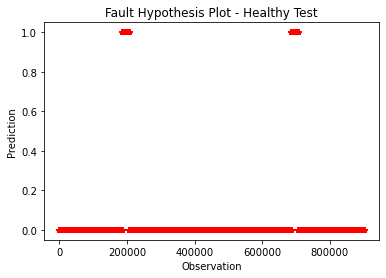

In [194]:
# Evaluate the model
X_pred = autoencoder.predict(X_test_pos_a)
mse = np.mean(np.power(X_test_pos_a - X_pred, 2), axis=1)
threshold = np.percentile(mse, 95)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Healthy Test')
plt.show()

28126/28126 [==============================] - 16s 571us/step


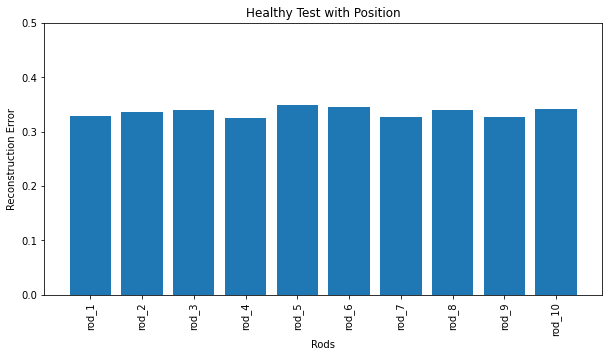

In [195]:
# Calculate reconstruction error for each variable on test data
test_data_pred = autoencoder.predict(X_test_pos_a)
test_data_recon_error = np.abs(X_test_pos_a - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)


# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
plt.ylim(0,0.5)
plt.title('Healthy Test with Position')
plt.show()

93751/93751 [==============================] - 53s 566us/step
Number of anomalies: 44631


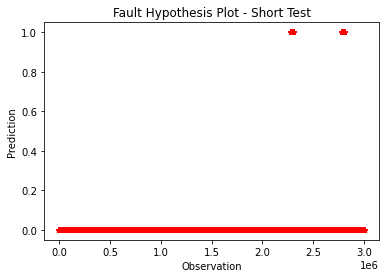

In [196]:
# Evaluate the model
X_pred = autoencoder.predict(x_test_pos_shor)
mse = np.mean(np.power(x_test_pos_shor - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Short Test')
plt.show()

93751/93751 [==============================] - 52s 556us/step


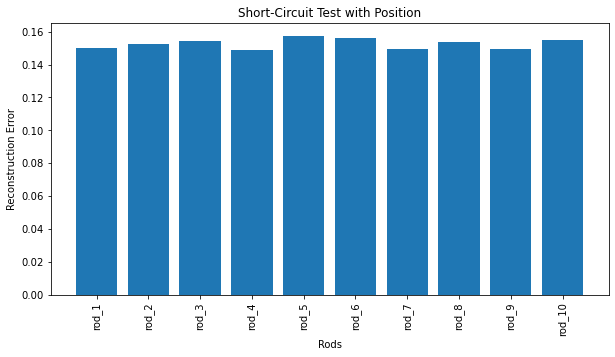

In [197]:
# Calculate reconstruction error for each variable on test data
test_data_pred = autoencoder.predict(x_test_pos_shor)
test_data_recon_error = np.abs(x_test_pos_shor - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
# plt.ylim(0,0.8)
plt.title('Short-Circuit Test with Position')
plt.show()

93751/93751 [==============================] - 52s 558us/step
Number of anomalies: 44977


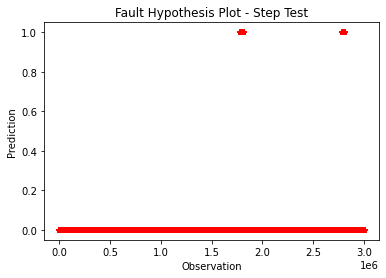

In [198]:
# Evaluate the model
X_pred = autoencoder.predict(x_test_pos_step)
mse = np.mean(np.power(x_test_pos_step - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Step Test')
plt.show()

93751/93751 [==============================] - 53s 566us/step


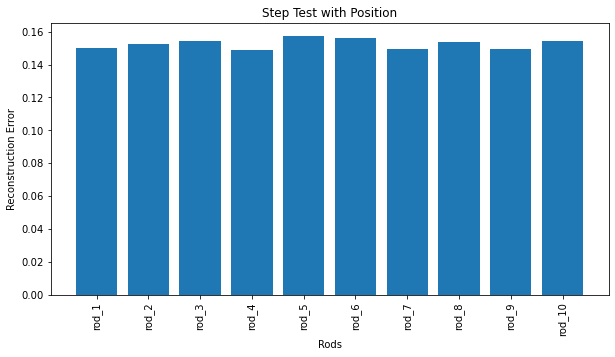

In [199]:
# Calculate reconstruction error for each variable on test data
test_data_pred = autoencoder.predict(x_test_pos_step)
test_data_recon_error = np.abs(x_test_pos_step - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
# plt.ylim(0,0.8)
plt.title('Step Test with Position')
plt.show()

93751/93751 [==============================] - 53s 562us/step
Number of anomalies: 44844


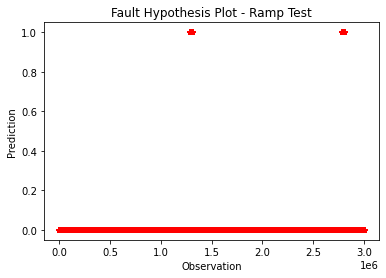

In [200]:
# Evaluate the model
X_pred = autoencoder.predict(x_test_pos_ramp)
mse = np.mean(np.power(x_test_pos_ramp - X_pred, 2), axis=1)
anomalies = np.where(mse > threshold)[0]
print('Number of anomalies:', len(anomalies))

# Predict Fault
predictions = np.zeros_like(mse)
predictions[mse > threshold] = 1

# Plot Hypothesis Curve
import matplotlib.pyplot as plt
plt.plot(predictions, 'r*')
plt.xlabel('Observation')
plt.ylabel('Prediction')
plt.title('Fault Hypothesis Plot - Ramp Test')
plt.show()

93751/93751 [==============================] - 52s 559us/step


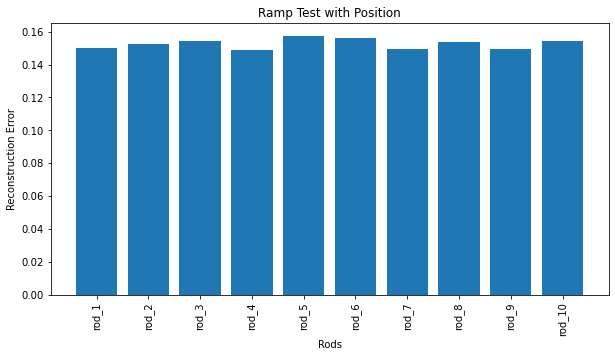

In [201]:
# Calculate reconstruction error for each variable on test data
test_data_pred = autoencoder.predict(x_test_pos_ramp)
test_data_recon_error = np.abs(x_test_pos_ramp - test_data_pred)
variable_recon_error = np.mean(test_data_recon_error, axis=0)

# Visualize reconstruction error per variable
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(1, input_dim+1), variable_recon_error)
plt.xticks(range(1, input_dim+1), ramp_torque_df.columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.xlabel('Rods')
# plt.ylim(0,0.8)
plt.title('Ramp Test with Position')
plt.show()